In [50]:
import pandas as pd
import os
import sys  
import folium
from datetime import datetime
import json
import matplotlib.pyplot as plt

sys.path.insert(1, '/02806-final-assingment/data')

# https://huggingface.co/datasets/Cainiao-AI/LaDe/tree/main

In [2]:
print(os.getcwd())

/Users/casper/Desktop/10. Semester/Social data and visualization/02806-final-assingment/code


In [57]:
delivery = pd.read_csv('../data/delivery_sh.csv')
pickup = pd.read_csv('../data/pickup_sh.csv')
roads = pd.read_csv('../data/roads.csv', sep='\t')

In [11]:
roads.geometry[1]

'LINESTRING (13376291.100042382 3539415.0794264674, 13376371.494978635 3539419.732865766, 13376510.23246001 3539424.0769366836, 13376547.49109358 3539426.1265136893, 13376579.65129447 3539432.790863852, 13376609.562841645 3539443.2192254104, 13376628.965828892 3539453.982747285, 13376673.549284954 3539478.7066561594, 13376726.949244685 3539520.2269476117, 13376743.391133478 3539533.9295760365, 13376768.36009526 3539546.820114915, 13376786.0153665 3539558.034894425, 13376858.228320178 3539609.1847275198, 13376866.55501809 3539615.075737204, 13376908.41114663 3539640.960118616, 13376936.519318053 3539657.6792915366, 13376961.332432553 3539669.8222975973, 13376993.670744628 3539684.8528286745, 13377019.530262338 3539694.7915515727, 13377046.569766652 3539702.538862386, 13377069.134227438 3539708.610385491, 13377094.492807439 3539712.8385391836, 13377159.080375997 3539718.961630116, 13377259.379237203 3539728.719909582, 13377280.062398592 3539728.307406202, 13377298.229739487 3539725.62613

In [30]:
map_hooray = folium.Map(
    location=(31.2304, 121.4737),
    control_scale=True,
    zoom_start=12
)


In [58]:
pickup

,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,aoi_type,pickup_time,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds
0,2349637,0,Shanghai,1448,07-08 08:13:00,07-08 09:00:00,07-08 11:00:00,121.52223,30.90747,46,14,07-08 10:10:00,07-08 10:10:00,121.52208,30.90836,NaN,NaN,NaN,708
1,4867696,0,Shanghai,1448,07-21 08:14:00,07-21 09:00:00,07-21 11:00:00,121.52223,30.90742,46,14,07-21 10:10:00,07-21 10:10:00,121.52689,30.91897,07-21 08:14:00,121.50334,30.90424,721
2,5691514,0,Shanghai,1448,07-12 07:40:00,07-12 17:00:00,07-12 19:00:00,121.52229,30.90731,46,14,07-12 17:22:00,07-12 17:22:00,121.52612,30.91764,07-12 07:37:00,121.49739,30.90695,712
3,1443776,0,Shanghai,1448,07-09 15:38:00,07-09 17:00:00,07-09 19:00:00,121.52234,30.90749,46,14,07-09 15:54:00,07-09 15:54:00,121.52316,30.90876,07-09 15:38:00,121.51814,30.90612,709
4,1806717,0,Shanghai,1448,07-07 07:25:00,07-07 09:00:00,07-07 11:00:00,121.52230,30.90747,46,14,07-07 09:53:00,07-07 09:53:00,121.51871,30.90687,07-07 07:25:00,121.49736,30.90752,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424401,2376930,67,Shanghai,15146,09-16 11:36:00,09-16 13:00:00,09-16 15:00:00,121.61411,31.20522,24428,14,09-16 13:27:00,09-16 13:27:00,121.63303,31.19924,09-16 11:35:00,121.62867,31.20045,916
1424402,1872604,67,Shanghai,15406,10-08 08:23:00,10-08 09:00:00,10-08 11:00:00,121.61416,31.20526,24428,14,10-08 10:39:00,NaN,NaN,NaN,NaN,NaN,NaN,1008
1424403,2633330,67,Shanghai,15406,10-25 09:05:00,10-25 11:00:00,10-25 13:00:00,121.61412,31.20529,24428,14,10-25 12:56:00,NaN,NaN,NaN,NaN,NaN,NaN,1025
1424404,4363494,67,Shanghai,15406,10-20 07:58:00,10-20 09:00:00,10-20 11:00:00,121.61448,31.20549,24428,14,10-20 09:47:00,NaN,NaN,NaN,NaN,NaN,NaN,1020


In [61]:
# Convert 'accept_gps_time' to datetime format
pickup['accept_time_dt'] = pd.to_datetime(pickup['accept_time'], format='%m-%d %H:%M:%S')
pickup['pickup_time_dt'] = pd.to_datetime(pickup['pickup_time'], format='%m-%d %H:%M:%S')

# Extract accept hour and minute
pickup['accept_hour'] = pickup['accept_time_dt'].dt.hour
pickup['accept_min'] = pickup['accept_time_dt'].dt.minute

# Extract pickup hour and minute
pickup['pickup_hour'] = pickup['pickup_time_dt'].dt.hour
pickup['pickup_min'] = pickup['pickup_time_dt'].dt.minute

# extract pickup day
pickup['pickup_day'] = pickup['pickup_time_dt'].dt.day
pickup['pickup_month'] = pickup['pickup_time_dt'].dt.month

pickup['accept_day'] = pickup['accept_time_dt'].dt.day
pickup['accept_month'] = pickup['accept_time_dt'].dt.month



In [62]:
pickup

,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,...,accept_time_dt,pickup_time_dt,accept_hour,accept_min,pickup_hour,pickup_min,pickup_day,pickup_month,accept_day,accept_month
0,2349637,0,Shanghai,1448,07-08 08:13:00,07-08 09:00:00,07-08 11:00:00,121.52223,30.90747,46,...,1900-07-08 08:13:00,1900-07-08 10:10:00,8,13,10,10,8,7,8,7
1,4867696,0,Shanghai,1448,07-21 08:14:00,07-21 09:00:00,07-21 11:00:00,121.52223,30.90742,46,...,1900-07-21 08:14:00,1900-07-21 10:10:00,8,14,10,10,21,7,21,7
2,5691514,0,Shanghai,1448,07-12 07:40:00,07-12 17:00:00,07-12 19:00:00,121.52229,30.90731,46,...,1900-07-12 07:40:00,1900-07-12 17:22:00,7,40,17,22,12,7,12,7
3,1443776,0,Shanghai,1448,07-09 15:38:00,07-09 17:00:00,07-09 19:00:00,121.52234,30.90749,46,...,1900-07-09 15:38:00,1900-07-09 15:54:00,15,38,15,54,9,7,9,7
4,1806717,0,Shanghai,1448,07-07 07:25:00,07-07 09:00:00,07-07 11:00:00,121.52230,30.90747,46,...,1900-07-07 07:25:00,1900-07-07 09:53:00,7,25,9,53,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424401,2376930,67,Shanghai,15146,09-16 11:36:00,09-16 13:00:00,09-16 15:00:00,121.61411,31.20522,24428,...,1900-09-16 11:36:00,1900-09-16 13:27:00,11,36,13,27,16,9,16,9
1424402,1872604,67,Shanghai,15406,10-08 08:23:00,10-08 09:00:00,10-08 11:00:00,121.61416,31.20526,24428,...,1900-10-08 08:23:00,1900-10-08 10:39:00,8,23,10,39,8,10,8,10
1424403,2633330,67,Shanghai,15406,10-25 09:05:00,10-25 11:00:00,10-25 13:00:00,121.61412,31.20529,24428,...,1900-10-25 09:05:00,1900-10-25 12:56:00,9,5,12,56,25,10,25,10
1424404,4363494,67,Shanghai,15406,10-20 07:58:00,10-20 09:00:00,10-20 11:00:00,121.61448,31.20549,24428,...,1900-10-20 07:58:00,1900-10-20 09:47:00,7,58,9,47,20,10,20,10


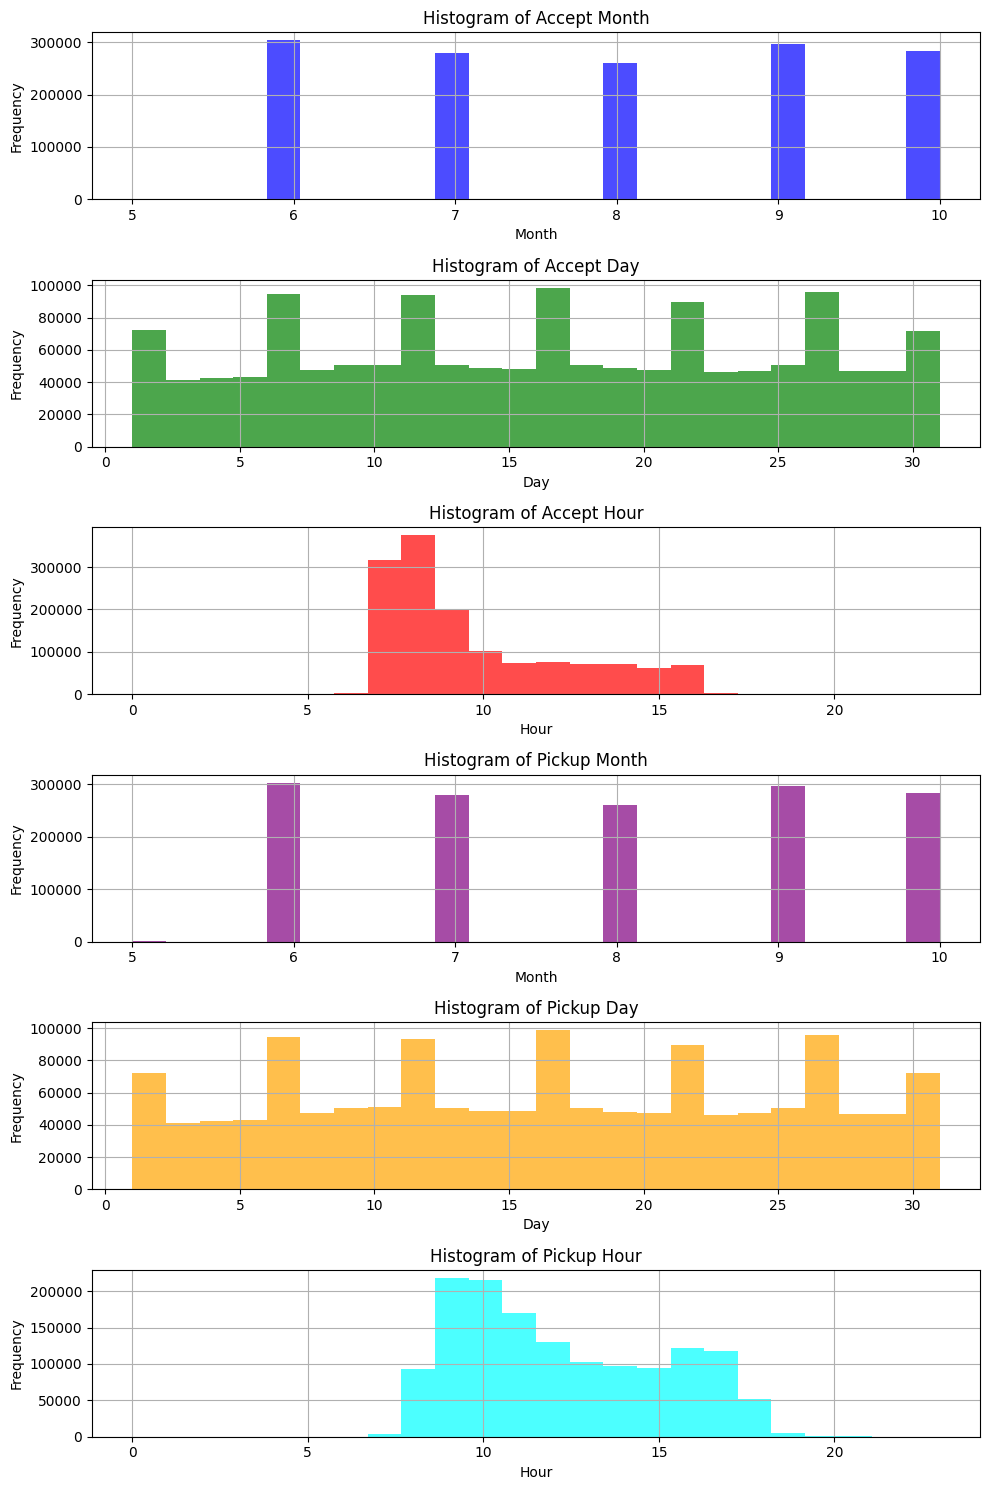

In [63]:

# Plot histograms
fig, axes = plt.subplots(6, 1, figsize=(10, 15))

pickup['accept_month'].hist(ax=axes[0], bins=24, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Accept Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')

pickup['accept_day'].hist(ax=axes[1], bins=24, color='green', alpha=0.7)
axes[1].set_title('Histogram of Accept Day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')

pickup['accept_hour'].hist(ax=axes[2], bins=24, color='red', alpha=0.7)
axes[2].set_title('Histogram of Accept Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Frequency')

pickup['pickup_month'].hist(ax=axes[3], bins=24, color='purple', alpha=0.7)
axes[3].set_title('Histogram of Pickup Month')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Frequency')
pickup['pickup_day'].hist(ax=axes[4], bins=24, color='orange', alpha=0.7)
axes[4].set_title('Histogram of Pickup Day')
axes[4].set_xlabel('Day')
axes[4].set_ylabel('Frequency')
pickup['pickup_hour'].hist(ax=axes[5], bins=24, color='cyan', alpha=0.7)
axes[5].set_title('Histogram of Pickup Hour')
axes[5].set_xlabel('Hour')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()